In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
idata = pd.read_csv(url, names=names)

In [9]:
# Features and target
X = idata.drop('Class', axis=1)
y = idata['Class']

In [10]:

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for KNN)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier


In [12]:
# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # k can be tuned
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
from sklearn.metrics import classification_report, confusion_matrix


In [14]:
# Predict on test set
y_pred = knn.predict(x_test_scaled)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

    avg / total       1.00      1.00      1.00        30



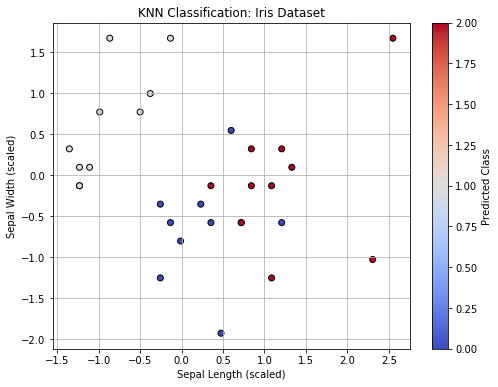

In [15]:

# Visualize (sepal-length vs sepal-width)
plt.figure(figsize=(8,6))
plt.scatter(x_test_scaled[:, 0], x_test_scaled[:, 1], c=pd.factorize(y_pred)[0], cmap='coolwarm', edgecolor='k')
plt.title('KNN Classification: Iris Dataset')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.colorbar(label='Predicted Class')
plt.grid(True)
plt.show()